---
title: Plotting
toc: true
output-file: plotting.html
---

## Matplotlib

![](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png){fig-align="center" width=350}

### Anatomy of a Figure

The most common plotting library in python is [matplotlib](https://matplotlib.org/).
matplotlib is very comprehensive and brings many idiomatic choices that sometimes can make it a bit cumbersome to wrap our heads around, so don't worry if you struggle with it a bit at first.

We will look at the most basic forms of plotting to try to understand the basic building blocks.
To go beyond that you will for sure need to look up more things, but the good news is that matplotlib is a decently old and very mature project, which facilitates searching for information on the internet and its official documentation is pretty good too.
To discover functionalities and for searching information, it is useful to take a look at the components of a plot:

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png){width=400 fig-align="center"}

Here's the code behind this figure in the [matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure).

:::{.callout-tip}
Take a look at the [examples gallery](https://matplotlib.org/stable/gallery/index.html) to reach for inspiration and guidance to plot your data.  
Also, even free Large Language Models (LLMs) such as (bing.com's or brave's built-in copilots) are pretty good at generating plotting instructions, especially when given the precise terminology regarding the plot – give them a try if you feel stuck making a figure.
:::

### Install matplotlib
```bash
uv add matplotlib
```

### Basic Plotting 
The official documentation has a nice quick intro to matplotlib concepts, let's take a look at that [here](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start).

You can find some nice cheatsheets [here](https://matplotlib.org/cheatsheets/).

One quick way to plot is calling functions from the `pyplot` module.  
These are some of the most of the commonly used functions:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.linspace(0, 10)
y = x * 2 + 1

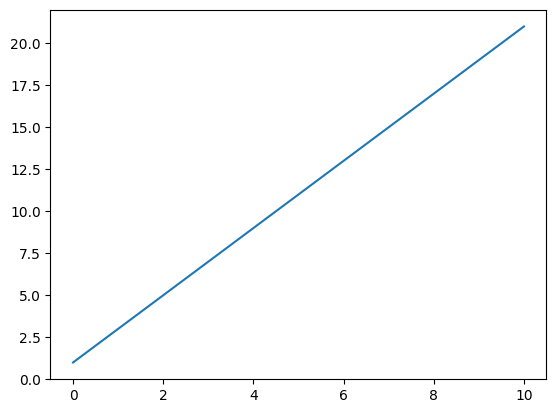

In [6]:
plt.plot(x, y)

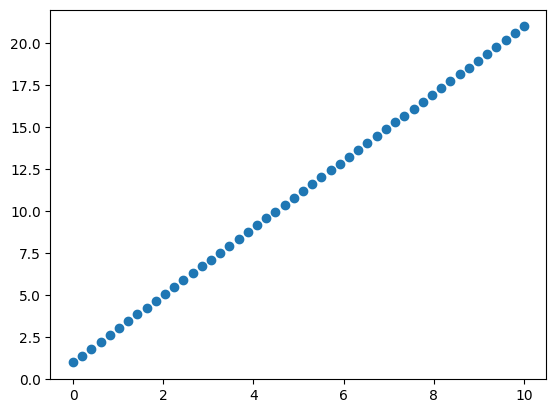

In [7]:
plt.scatter(x, y)

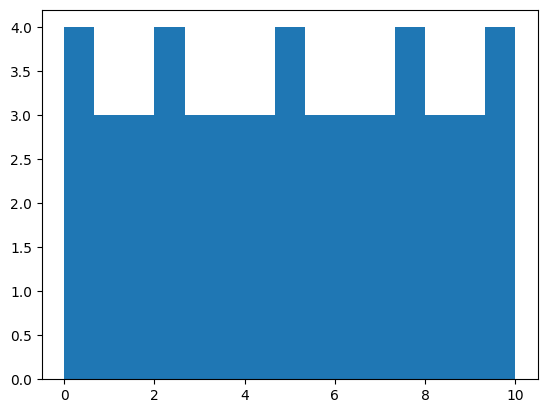

In [8]:
plt.hist(x, bins=15);

That is fine and can take us far, especially for rapid exploration.
But it has some limitations.
There is a more powerful and extensive API way to plot:

:::{.callout-note}
API means Application Programming Interface.
More details in the glossary.
:::

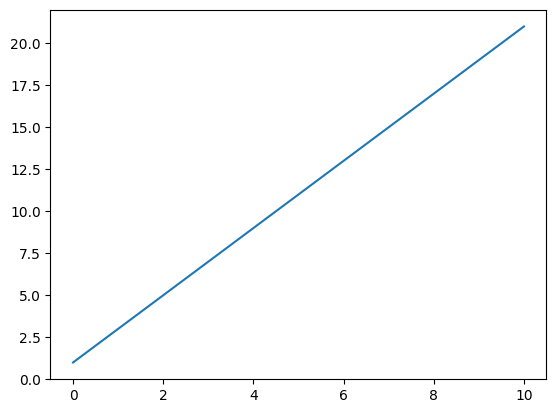

In [9]:
fig, ax = plt.subplots()  # Create a figure containing a single Axes
ax.plot(x, y)             # Plot on that Axes

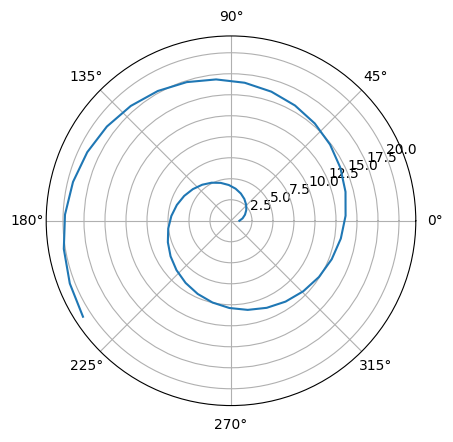

In [10]:
plt.polar(x, y)

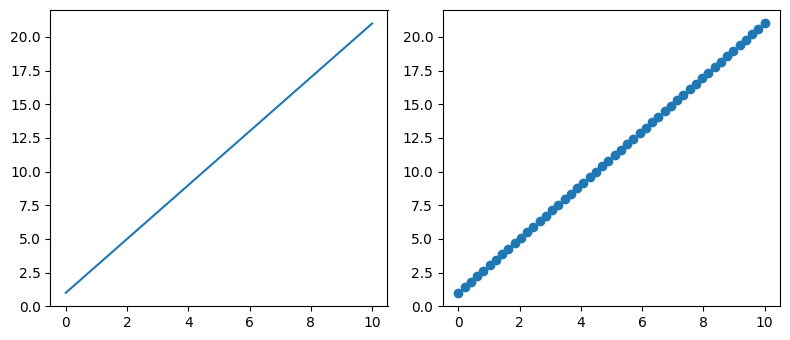

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))  # Create a figure containing 2 Axes
ax1.plot(x, y)
ax2.scatter(x, y)
fig.tight_layout()

Notice that fig also contains the axes and that axes are a numpy array!

In [12]:
fig, axes = plt.subplots(ncols=2);
fig.delaxes(axes[0])
fig.delaxes(axes[1])
type(axes)

numpy.ndarray

<Figure size 640x480 with 0 Axes>

This numpy array grid generalizes and indeed how this objects compose nicely with the python language in general:

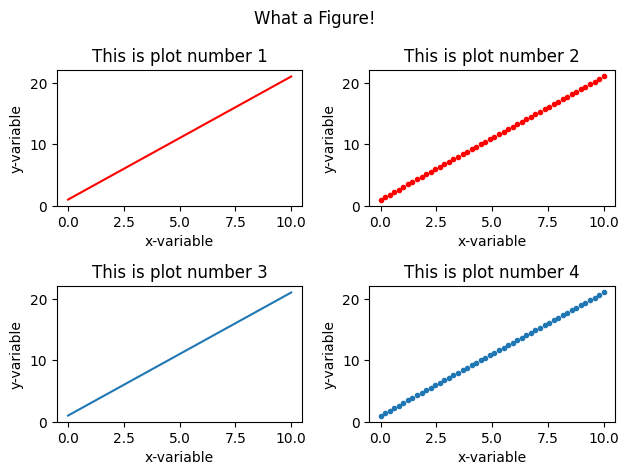

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2)
((ax1, ax2), (ax3, ax4)) = axes
ax1.plot(x, y, color="red")
ax2.scatter(x, y, color="red", marker=".")
ax3.plot(x, y)
ax4.scatter(x, y, marker=".")

for i, ax in enumerate(axes.flatten(), start=1):
    ax.set_title(f"This is plot number {i}")
    ax.set_xlabel("x-variable")
    ax.set_ylabel("y-variable")
fig.suptitle("What a Figure!")  # Yeah, set_suptitle would be nicer
fig.tight_layout()

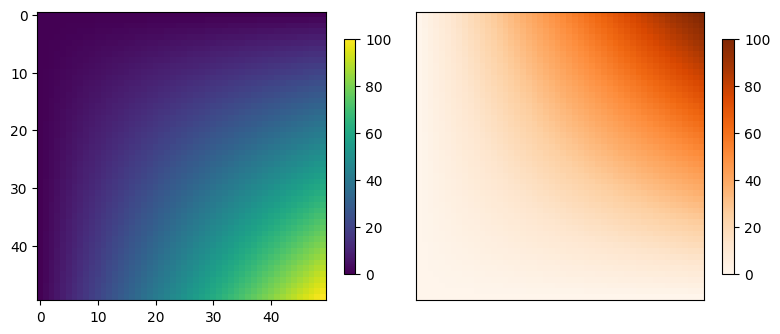

In [14]:
data = np.outer(x, x)

def plot_images(data):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 5))
    img1 = ax1.imshow(data)
    img2 = ax2.imshow(data, origin="lower", cmap="Oranges")
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.colorbar(img1, shrink=.5)
    plt.colorbar(img2, shrink=.5)
    fig.tight_layout()

plot_images(data)

### Saving Figures
We can save the figure in different formats (the file extensions serves as guide):

In [15]:
fig.savefig("fig.png")
fig.savefig("fig.svg")  # Vector graphics are supported out of the box!

If you want a more in-depth introduction to the matplotlib library, take a look at this talk.

{{< video https://www.youtube.com/watch?v=6gdNUDs6QPc >}}

## Seaborn

![](http://seaborn.pydata.org/_images/kde_ridgeplot.png){width=300 fig-align="center"}

[seaborn](https://seaborn.pydata.org) is a data visualization library built on top of matplotlib.  
It implements a high-level interface for plotting statistical graphics.
Seaborn integrates very well with `pandas` dataframes as input data and abstracts away some of the common data pre-processing steps.

Install seaborn:
```bash
uv add seaborn
```

In [18]:
import seaborn as sns

For the sake of the example we can repeat the figure from above, but we will execute this one line of code that sets up some defaults for us:

In [19]:
sns.set_theme(style="dark", font_scale=1.4)  # this has global effects

In [20]:
import seaborn as sns

In [21]:
df = sns.load_dataset("fmri")
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

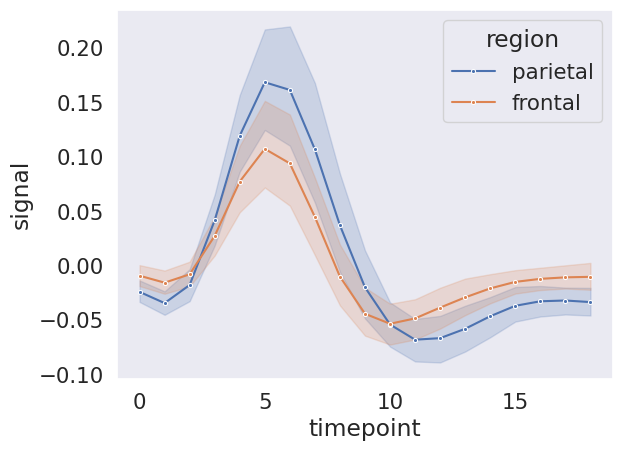

In [22]:
sns.lineplot(df, x="timepoint", y="signal", marker=".", hue="region")

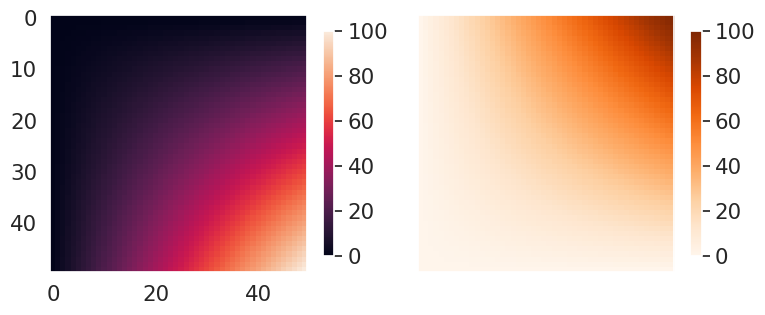

In [23]:
plot_images(data)

There are many great plot examples in the [example gallery](https://seaborn.pydata.org/examples/index.html).

Here are a few interesting ones – **click on figure to open** documentation website with code.

:::: {.columns}
::: {.column width="50%"}
**Multiple Regression**

[![](http://seaborn.pydata.org/_images/multiple_regression.png){fig-align="center"}](http://seaborn.pydata.org/examples/multiple_regression.html)

:::

::: {.column width="50%"}
**Time Series**

[![](http://seaborn.pydata.org/_images/wide_data_lineplot.png){fig-align="center"}](http://seaborn.pydata.org/examples/wide_data_lineplot.html)

:::

::::

:::: {.columns}
::: {.column width="50%"}
**Heat Scatter of Brain Networks Correlations**

[![](http://seaborn.pydata.org/_images/heat_scatter.png){width=250 fig-align="center"}](http://seaborn.pydata.org/examples/heat_scatter.html)

:::

::: {.column width="50%"}
**Annotated Heatmap**

[![](http://seaborn.pydata.org/_images/spreadsheet_heatmap.png){width=400 fig-align="center"}](http://seaborn.pydata.org/examples/spreadsheet_heatmap.html)

:::
::::

:::: {.columns}
::: {.column width="50%"}
**Small multiple time series**

[![](http://seaborn.pydata.org/_images/timeseries_facets.png){width=400 fig-align="center"}](http://seaborn.pydata.org/examples/timeseries_facets.html#small-multiple-time-series)

:::
::: {.column width="50%"}
**Scatterplot with categorical variables**

[![](http://seaborn.pydata.org/_images/scatterplot_categorical.png){width=400 fig-align="center"}](http://seaborn.pydata.org/examples/scatterplot_categorical.html)

:::
::::

:::: {.columns}
::: {.column width="50%"}
**Violin Plot**
[![](http://seaborn.pydata.org/_images/wide_form_violinplot.png){width=400 fig-align="center"}](http://seaborn.pydata.org/examples/wide_form_violinplot.html)
:::

:::: 

## Exercises
1) Use numpy to create 4 arrays of numbers drawn from 4 different distributions: uniform, normal, lognormal and exponential. Each array should have of 100000 samples. Use matplotlib to plot a grid of 2x2 subplots, with one histogram on each subplot.
Each histogram should have a different color.
Hint: Look at numpy's submodule `random`.

2) Pick one interesting example of the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html) and reproduce it on your computer. Change 1 or 2 parameters of the plot, for example, some color or order of variables, remove/add a variable. If you have own data with a similar shape, plot those! 
